# TP noté 1 - segmentation d'images

Le but de ce TP est de segmenter des images aériennes. Deux méthodes seront étudiées, une par croissance de région et une par apprentissage supervisé.

Le TP sera idéalement fait en binôme et éventuellement seul. Il sera rendu sous forme de notebook python executé. Si le TP est fait en binôme, n'oubliez pas de noter **le nom des deux personnes** ayant travaillé dessus au tout début du notebook rendu.  



# Noms et Prénoms: Jean-Pierre Mansour, Paul Pasquet, Ezekiel Rembangouet

In [8]:

import numpy as np                 #pour faire des mathematiques numeriques
import matplotlib.pyplot as plt    #pour afficher des images (fonction imshow)
import numpy.random as nprand      #pour tirer des valeurs aleatoirement
import matplotlib.pyplot


def showRGBImage(InputImage,mask='Null'):
  if mask=='Null':
    plt.figure()
    plt.imshow(InputImage)
    plt.show()
  else:
    shapeMask=list(mask.shape)
    shapeMask.append(3)
    maskRGB=np.zeros(shapeMask)
    maskRGB[:,:,0]=mask[:,:]
    maskRGB[:,:,1]=mask[:,:]
    maskRGB[:,:,2]=mask[:,:]
    plt.figure()
    plt.imshow(InputImage*maskRGB)
    plt.show()



def showRGBImage_channels(InputImage):
    plt.figure()
    plt.imshow(InputImage[:,:,0],cmap='Greys')
    plt.title('channel 0: red')
    plt.colorbar()

    plt.figure()
    plt.imshow(InputImage[:,:,1],cmap='Greys')
    plt.title('channel 1: green')
    plt.colorbar()

    plt.figure()
    plt.imshow(InputImage[:,:,2],cmap='Greys')
    plt.title('channel 2: blue')
    plt.colorbar()

    plt.show()


def showGLImage(InputImage, mask='Null', ColorMapForLabels=0):
    if isinstance(mask, str) and mask == 'Null':
        if ColorMapForLabels > 0.5:
            imgplot = plt.imshow(InputImage, cmap='gist_ncar')
        else:
            imgplot = plt.imshow(InputImage, cmap='Greys')
        plt.colorbar()
        plt.show()
    else:
        if ColorMapForLabels > 0.5:
            imgplot = plt.imshow(InputImage * (mask > 0.5), cmap='gist_ncar')
        else:
            imgplot = plt.imshow(InputImage * (mask > 0.5) + InputImage * (mask < 0.5) * 0.3, cmap='Greys')
        plt.colorbar()
        plt.show()





## EXERCICE 1 - Segmentation par croissance de région


### QUESTION 1.1 :

Sur l'image niveau de gris 'Tournefeuille_NDG.png', coder et tester un algorithme de croissance de région pour segmenter des toits. On codera idéalement l'algorithme vu en cours avec un 4-voisinage (ligne 13 de l'algo) et une distance  entre les points voisins (lignes 14 et 15 de l'algo) qui ne dépend que des intensités de l'image. Il ne sera pas forcement nécessaire de coder la fonction qui ordonne le parcours (ligne 10 de l'algo), même si elle permet d'accélérer les calculs. Notons que les calculs se stoppent quand le coût maximum $C_{max}$ est atteint partout. 


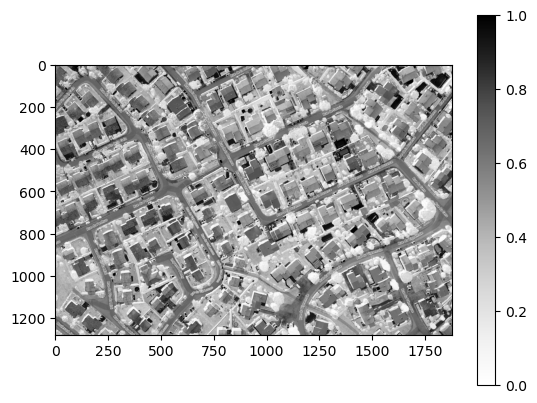

In [11]:
Im=matplotlib.pyplot.imread('Tournefeuille_NDG.png')*1.  # '*1. is a convinent way to cast the image intensities in float

showGLImage(Im)

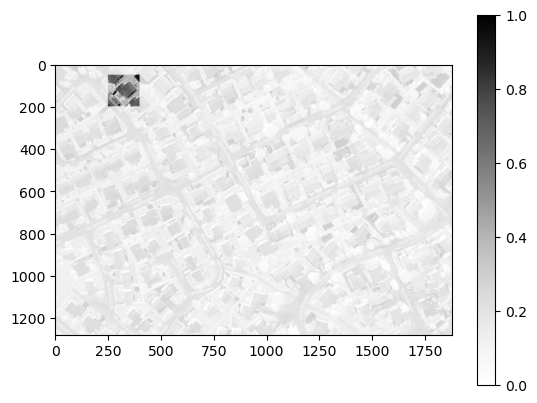

In [13]:

FakeSegmentedImage=np.zeros([Im.shape[0],Im.shape[1]])
FakeSegmentedImage[50:200,250:400]=1


showGLImage(Im,mask=FakeSegmentedImage)


In [15]:

def RegionGrowth(InputImage, seed, Cmax, max_pixels):
    """
    Function to segment the grey level image InputImage using a region growth algorithm
    Inputs:
     - InputImage: 2D grey level image encoded in a numpy array
     - seed: pixel coordinates giving the starting location of the region growth
     - Cmax: threshold above which the region propagation is stopped
    """
    
    m, n= InputImage.shape
    C= np.full((m, n), Cmax)
    Segmented_Image= np.zeros((m, n))
    
    C[tuple(seed)] = 0
    p = [tuple(seed)]
    chgmt= 1
    num_pixels = 0  
    
    while chgmt > 0 and num_pixels < max_pixels:
        chgmt = 0
        p.sort(key=lambda pixel: C[tuple(pixel)])  
        List_New_Pixel= []
        
        for (p_x, p_y) in p:
            for (v_x, v_y) in [(p_x - 1, p_y), (p_x + 1, p_y), (p_x, p_y - 1), (p_x, p_y + 1)]: 
                if 0 <= v_x < m and 0 <= v_y < n:
                    new_cost = C[p_x, p_y] + abs(InputImage[v_x, v_y] - InputImage[p_x, p_y])
                    if C[v_x, v_y]> new_cost and new_cost< Cmax:
                        C[v_x, v_y]= new_cost
                        List_New_Pixel.append((v_x, v_y)) 
                        chgmt+=1
                        num_pixels+= 1
                        if num_pixels>= max_pixels:
                            break  
            if num_pixels>= max_pixels:
                break
        
        p.extend(List_New_Pixel)
    
    for (p_x, p_y) in p:
        Segmented_Image[p_x, p_y]= 1

    return Segmented_Image





### QUESTION 1.2 :

Segmenter les toits ayant le point [650,848], le point [638,1017], le point [289,954] et le point [778,353]. Commenter la facilité à segmenter les toits avec l'algorithme codé à la question précédente.



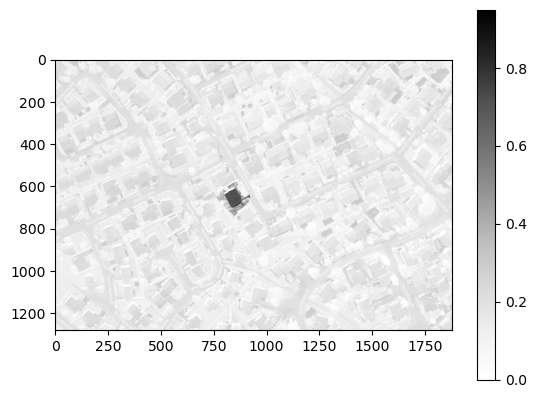

In [18]:
seed=[650,848]

ImSeg=RegionGrowth(Im,seed, Cmax=0.8,max_pixels=20000) 
showGLImage(Im, mask=ImSeg)



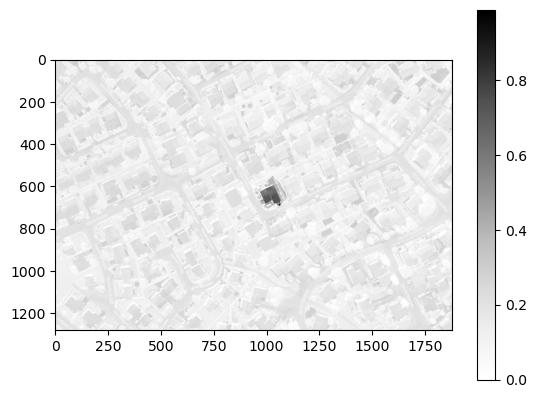

In [19]:
seed=[638,1017] 

ImSeg=RegionGrowth(Im,seed,0.8,max_pixels=20000) 
showGLImage(Im, mask=ImSeg)


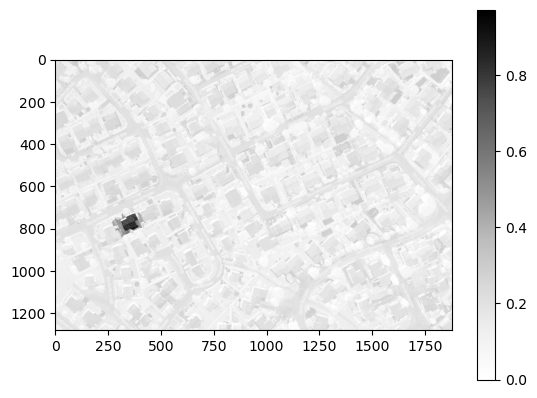

In [20]:

seed=[778,353]

ImSeg=RegionGrowth(Im,seed,1.2,max_pixels=150000) 
showGLImage(Im, mask=ImSeg)

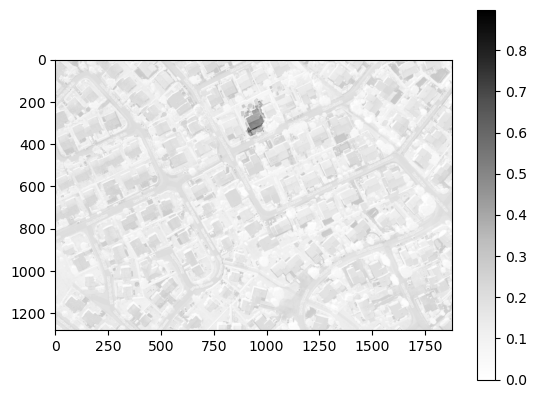

In [21]:
seed=[289,954] 

ImSeg=RegionGrowth(Im,seed,0.8,max_pixels=20000) 
showGLImage(Im, mask=ImSeg)

# On constate que l’ajout du nombre maximal de pixels comme paramètre supplémentaire à la fonction RegionGrowth s’est révélé énormément utile, car il permet d’empêcher l’algorithme de croissance de région de couvrir toute l’image et de se limiter à la zone d’intérêt.


# Le paramètre Cmax, quant à lui, permet de contrôler la propagation de la région segmentée. Lorsque Cmax est trop grand, la région considérée a tendance à se propager de manière incontrôlée, couvrant ainsi toute l’image, car la capacité maximale fixée à l’avance n’est jamais atteinte. Cela est parfaitement cohérent avec le principe de l'algorithme de croissance de région.


# La méthode de croissance de région appliquée à la segmentation des toits, confère l'avantage de bien fonctionner, grâce à l'homogénéité des couleurs des toits. De plus, l'avantange de la segmentation des toits est leur forme géométrique simple et régulière.


#### ## EXERCICE 2 - apprentissage supervise pour la segmentation

#### QUESTION 2.1 
Sur l'image couleur 'Tournefeuille_RGB.png'. Utilisez un algorithme d'apprentissage supervise (ex un random forsetde la librairie Scikit-learn) pour apprendre a detecter automatiquement les piscines (pleines et non bachees), puis les detecter.

La demarche sera la suivante :
- 1) Identifier un groupe de points dans les piscines et un groupe de points a l'exterieur des piscines tout en attribuant un label 1 a piscine et un label 0 a non-piscine. Par exemple, les coordonnees [942,1782], [868,1809], [823,1285], [767,1284], [183,1612], [257,119] sont sur des piscines pleines et non bachees. On remarquera que le 1er indice des coordonnées correspond aux 'ordonnées' dans les images de haut en bas et que le 2eme indice correspond aux 'abscisses' de gauche à droite.
- 2) Utiliser ces points et labels pour apprendre les parametres qui permettent de detecter une piscine
- 3) Utiliser ces parametres pour detecter les piscines dans tous les points de l'image


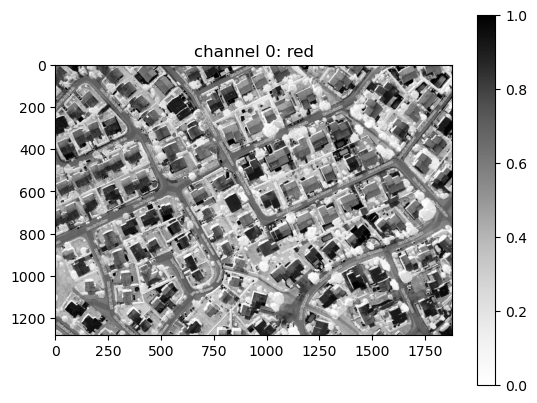

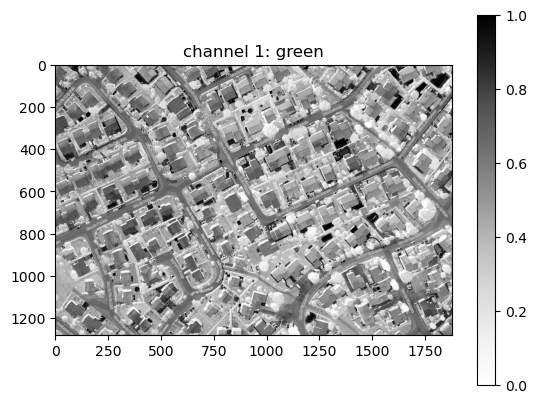

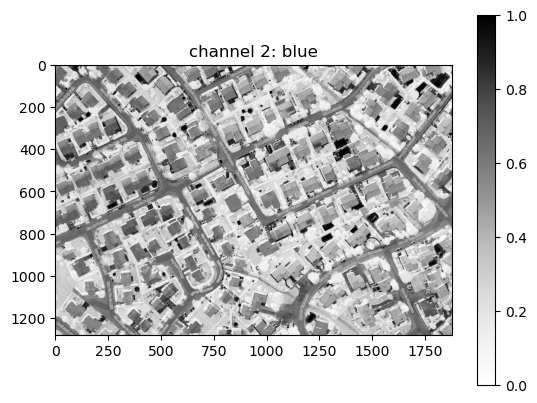

Image shape :  (1279, 1878, 3)


In [26]:

Im=matplotlib.pyplot.imread('Tournefeuille_RGB.png')*1.

showRGBImage_channels(Im)

print('Image shape : ',Im.shape)  #ressort la taille de l'image et le nombre de canaux (ici 3 car image RGB)


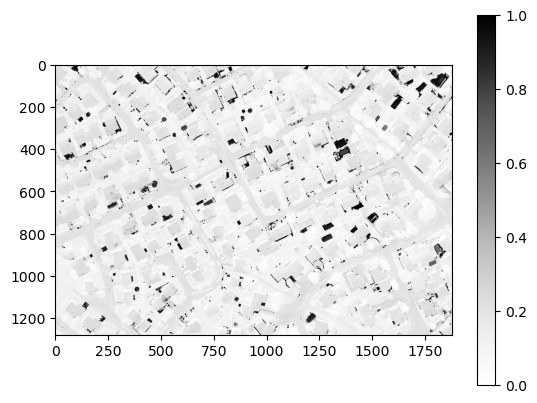

In [27]:
#a) data preparation

piscines=np.array([[942, 1782], [868, 1809], [823, 1285], [767, 1284], [183, 1612], [257, 119]])

# Pour les points non-piscine, l'idée est de sélectionner des points aléatoires dans l'image qui peuvent correspondre à des toits, des voitures, de la pelouse ou des bâtiments. De cette façon, nous fournirons au modèle des données d'entraînement variées pour améliorer son apprentissage, et par la suite, sa performance.
non_piscines=np.array([[600, 550], [800,750], [900,1600], [1100,500], [700,1750], [1050,1400]])


X = np.zeros((12, 3)) 
y = np.zeros(12) 

i = 0  
for p in piscines:
    X[i] = Im[p[0], p[1], :] 
    y[i] = 1  
    i += 1 

j=6
for p in non_piscines:
    X[j] = Im[p[0], p[1], :]  
    y[j] = 0 
    j += 1 


#b) Entraine

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=10, random_state=0) #the parameters can be changed
clf.fit(X, y)

#c) test on all image points

height, width, RGB = Im.shape
all_pixels = Im.reshape(-1, 3) 
predictions = clf.predict(all_pixels)
ImSeg_RF = predictions.reshape(height, width)

#d) show the segmentation 
Im_gray = np.mean(Im, axis=2)
showGLImage(Im_gray, mask=ImSeg_RF)


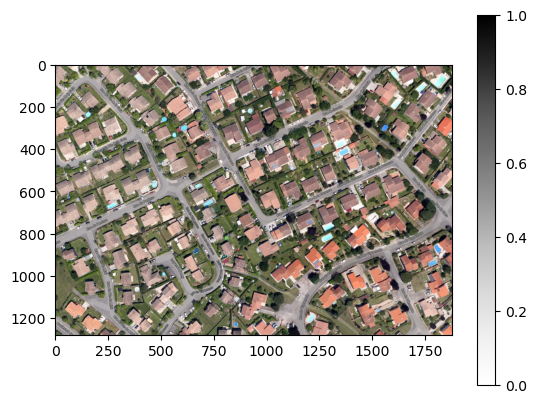

In [30]:
# Comparer avec l'image originale: 
Im=matplotlib.pyplot.imread('Tournefeuille_RGB.png')*1.
showGLImage(Im)

### QUESTION 2.2
Que la methode marche bien ou pas, interpreter le resultat.


# En comparant les deux images, à première vue, l'algorithme RandomForest semble détecter sans difficulté presque toutes les piscines, malgré un certain bruit. À noter que les piscines apparaissent en noir dans l'image générée par l'algorithme d'apprentissage supervisé.

# Comme l’on peut naturellement s’y attendre, en augmentant la profondeur des arbres dans l'algorithme RandomForest fonctionne nettement mieux.

# Il n'est pas nécessaire d'introduire de nouvelles variables, comme la longueur de la forêt, ou de considérer l'algorithme XGBoost, car cet algorithme fonctionne déjà bien.


### Question 2.3

Est-ce que le classifieur généralise bien ses prédictions sur une image acquise dans une autre ville (Tournefeuille -> Beverly Hills) ?


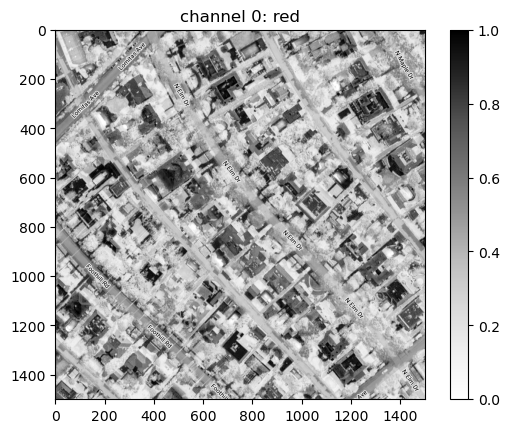

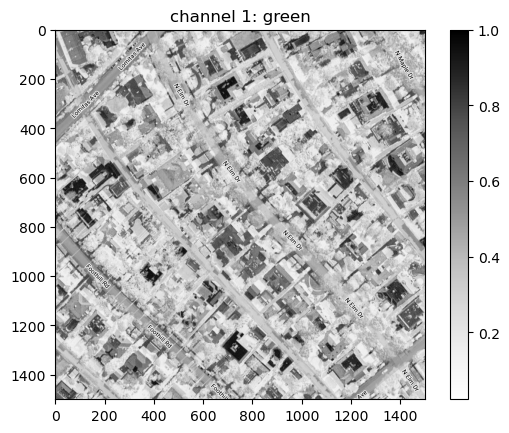

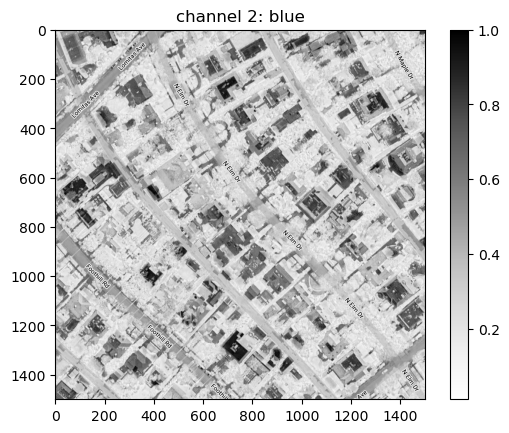

In [35]:


Im_BH=matplotlib.pyplot.imread('beverlyhills1.png')*1.

showRGBImage_channels(Im_BH)


#...


# L'image BerverlyHills1 est de taille (1500, 1500, 4). Pour la rendre de la même taille que Tournefeuille, on execute ce code:

In [37]:
from skimage.transform import resize

Im_BH = matplotlib.pyplot.imread('BeverlyHills1.png') * 1.0

Image_BH_RGB = Im_BH[:, :, :3]  #enlève le canal alpha

Im_BH_nv =resize(Image_BH_RGB, (1279, 1878), anti_aliasing=True)

print("La nouvelle image BeverlyHills1 est de taille:", Im_BH_nv.shape)

La nouvelle image BeverlyHills1 est de taille: (1279, 1878, 3)


# À ce stade, nous avons 
entraîé un modèle qui détecte les piscines dans une image, sur l'image Tournefeuille. L'idée à présent est de voir s'il se généralise bien sur une l'image de test BeverlyHills1. r

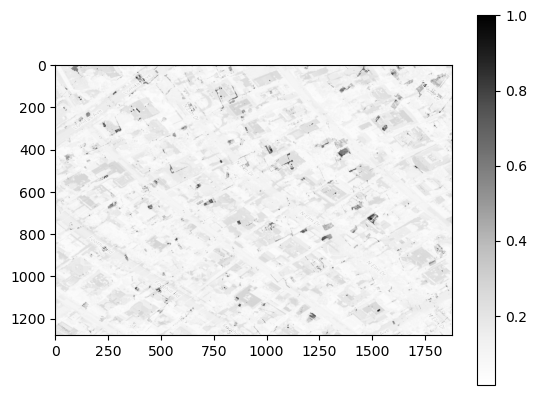

In [41]:
from sklearn.ensemble import RandomForestClassifier

Im=matplotlib.pyplot.imread('Tournefeuille_RGB.png')*1.


piscines=np.array([[942, 1782], [868, 1809], [823, 1285], [767, 1284], [183, 1612], [257, 119]])
non_piscines=np.array([[600, 550], [800,750], [900,1600], [1100,500], [700,1750], [1050,1400]])
X = np.zeros((12, 3)) 
y = np.zeros(12) 
i = 0  
for p in piscines:
    X[i] = Im[p[0], p[1], :] 
    y[i] = 1  
    i += 1 
j=6
for p in non_piscines:
    X[j] = Im[p[0], p[1], :]  
    y[j] = 0 
    j += 1 

clf = RandomForestClassifier(max_depth=10, random_state=0) #the parameters can be changed
clf.fit(X, y)
height_BH, width_BH, RGB = Im_BH_nv.shape
all_pixels_BH = Im.reshape(-1, 3) 
predictions_BH = clf.predict(all_pixels_BH)
ImSeg_RF_BH = predictions_BH.reshape(height_BH, width_BH)




Im_BH_gray = np.mean(Im_BH_nv, axis=2)
showGLImage(Im_BH_gray, mask=ImSeg_RF_BH)

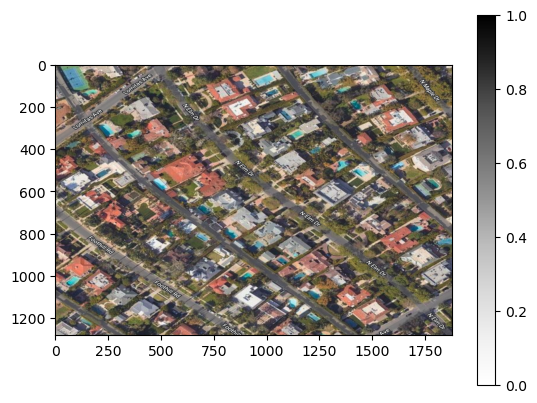

In [42]:
#En comparant avec l'image originale:
showGLImage(Im_BH_nv)

# Il est bien bien clair que les prédictions de ce modèle ne se généralisent pas bien à l'image de test BerverlyHills1. Il pourra être utile d'augmenter les données d'entrainement, dans le modèle entrainé sur Tournefeuille